## **ENTERTAINMENT COMPANY NETFLIX INC.**

---



<img src=https://biznis.rs/wp-content/uploads/2021/04/netflix.jpg>

1. IMPORT DATA BASE

  (Pandas and Numpy environment)

In [ ]:
# IMPORT THE REQUIRED LIBRARIES
import pandas as pd               # Structured data management (Dataframe)
import numpy as np                # Matrix management
import matplotlib.pyplot as plt   # Graphs
import seaborn as sns             # Graphs
print(pd.__version__)

2.2.2


In [ ]:
## 2.IMPORTAR BASE DE DATOS
##############################          DATA ANALYSIS ON NETFLIX          ##############################
# Crear DataFrame de Pandas
netflix_titles = "/content/netflix_titles.csv"
df_net = pd.read_csv(netflix_titles)

df_net.head(4) # Primera y últimas filas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


> **1. DATABASE DISPLAY**

---





In this item performed quick look at the general characteristics in dataset as shape and types variable involved.

In [ ]:
# 1. Dataset information
print("Data dimension: ",df_net.shape)
print("Data column: ",df_net.columns)

Data dimension:  (8807, 12)
Data column:  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
# 2. Variable information
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Previously for analysis, We note that exist missing values in six variables. It was therefore neccesary performed a treatment for this cases.
In addittion we must identified if exist other cases that needs treatment as dupplicateds or invalids values.

> **2. DATA CLEANING DEVELOPMENT**

---



In [ ]:
# 2.1. Dupplicated value
df_net.duplicated().sum()

0

In [ ]:
# Delete the dupplicates
df_net.drop_duplicates(inplace= True)

On first item, there is no evidence of dupplicated values but I incluyed the command neccesary for remove these cases.

In [ ]:
# 2.2. Missing value
df_net.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


On second item, I was able to detected specific variables that evidenced missing values. In order to improve the presentation I defined an object called "missing" in order ascending and showing yours percent values.

In [ ]:
# Define the object “missing”
def missing(df):

# Calculate missing value count for each column
    missing_value = df.isnull().sum()
    missing_value = missing_value.reset_index().rename(                         # reset_index(): Converts the result index into a column
                    columns={'index':'Column', 0:'Missing_value_count'})

# Calculate missing value percentage for each column
    missing_percent = df.isnull().sum() * 100 / df_net.shape[0]                 # Operation to get the percentage
    missing_percent = missing_percent.reset_index().rename(
                    columns={'index':'Column', 0:'Missing_Percentage (%)'}).round(2)

# We'll merge the previous results
    missing_Final = missing_value.merge(missing_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    missing_Final = missing_Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return missing_Final

missing(df_net)

,Column,Missing_value_count,Missing_Percentage (%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


For the purpose of realizing data cleaning I need to has a copy database to work called "df".

In [ ]:
# Copy Database
df = df_net.copy()

In [ ]:
# Missing value processing
############################################## Case 1   (NaN ---> 'NULL')
# Replace values "NaN" in the columns
df.replace({'director': np.nan, 'country': np.nan, 'cast': np.nan},
          {'director': 'NULL', 'country': 'NULL', 'cast': 'NULL'},
          inplace=True)
                          # director (29.91 %)
                          # country  (9.44  %)
                          # cast     (9.37  %)

# Check to see if all NaN values are resolved
# Filter rows with "NULL" in some columns
NULL = df.loc[(df['director'] == 'NULL') |
             (df['country'] == 'NULL') |
             (df['cast'] == 'NULL')]

NULL.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NULL,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NULL,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NULL,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NULL,NULL,NULL,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NULL,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
null_directors = df[df['director'] == 'NULL'].shape[0]
null_country = df[df['country'] == 'NULL'].shape[0]
null_cast = df[df['cast'] == 'NULL'].shape[0]
print("Count of directores NULL:", null_directors)
print("Count of country NULL:", null_country)
print("Count of cast NULL:", null_cast)

Count of directores NULL: 2634
Count of country NULL: 831
Count of cast NULL: 825


Missing values (Case 1): All cases finded are in string variables that I can't replace with any significant value based on stathistics measures. Therefore I considered giving it a label for each record found calling it "NULL" in variables: 'director','country' and 'cast'.

In [ ]:
############################################## Case 2   (NaN ---> MODE)
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
# Check to see if all NaN values are resolved
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Missing values (Case 2): In some cases of the variable 'date_added' I saw neccesary replace records for some stathistic measure, thus in this cases I inserted the mode of the variable.

In [ ]:
############################################## Case 3   (Dropping rows with NaN)
df = df.dropna(subset=["rating"])
# Check to see if all NaN values are resolved
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Missing values (Case 3): Considering that exist different records where the films or TV Shows haven't some clasiffication about the content I thought correct delete it of the dataset then knowing that represented just four cases.

In [ ]:
############################################## Case 4   (translate values: var1 --> var2) and delete
import re # Working with regular expressions

# Function to verify if a string contains "min" o "Season"
def contain(valor):
    return bool(re.search(r'\b(min|Season)\b', str(valor), re.IGNORECASE))

# Filter rows with specific conditions
filter = df[(df['rating'].str.contains(r'\b(min|Season)\b', case=False)) & df['duration'].isnull()]

# Copy values: (rating --> duration) in rows filters
df.loc[filter.index, 'duration'] = df.loc[filter.index, 'rating']

# Dropping erroneous values in 'rating'
df.loc[filter.index, 'rating'] = np.nan

<ipython-input-14-8b9b410448f1>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filter = df[(df['rating'].str.contains(r'\b(min|Season)\b', case=False)) & df['duration'].isnull()]


In [ ]:
# Drop ultimate cases
df = df.dropna(subset=["rating"])
# Check it
print("Total of missing values in RATING:",df[df['rating'].isnull()])
print("Total of missing values in DURATION:",df[df['duration'].isnull()])

Total of missing values in RATING: Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []
Total of missing values in DURATION: Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


Missing values (Case 4): In this ultimate cases, I had define an object called 'contain' for explain the following procedure: Determine the records in variable 'rating' that corresponds to the 'duration'. The main objective is transfer to where they belong. In addition I had to drop the cases where initially they were. Finally I ran the script and verified the results.

In [ ]:
missing(df)

,Column,Missing_value_count,Missing_Percentage (%)
0,show_id,0,0.0
1,type,0,0.0
2,title,0,0.0
3,director,0,0.0
4,cast,0,0.0
5,country,0,0.0
6,date_added,0,0.0
7,release_year,0,0.0
8,rating,0,0.0
9,duration,0,0.0


In [ ]:
# 2.3. Invalid value

# Invalid value processing
df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

In [ ]:
df = df[~df['title'].str.startswith('#')]              # Dropping rows started with "#" filas que empiezan con '#'

df = df[~df['title'].str.match(r'^\d{1,5}$')]          # Dropping rows that contains numbers from '1' to '99999'

df = df[df['title'].str.match('^[a-zA-Z]')]            # Dropping rows that does not begin with a letter
# Verifying
df[df['title'].str.contains('#')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In this third item I corrected those cases that present particular characteristics that I considered based on particular criteria.

> **3. EDA ANALYSIS**

---


<ipython-input-19-9dadb9869ebe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="type", data=df, palette="mako")


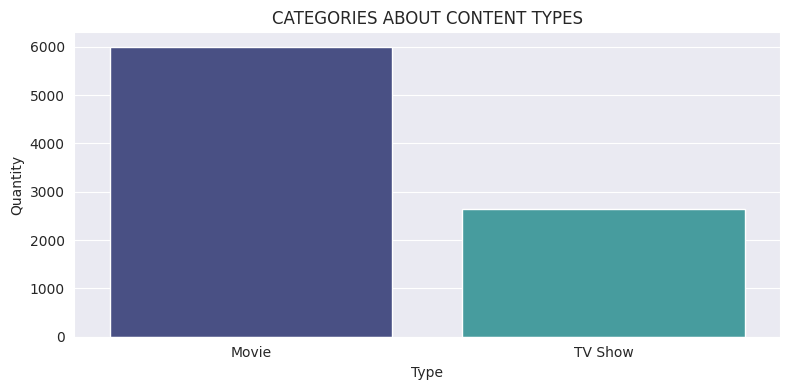

In [ ]:
# 1. (HISTOGRAM)   ------> Variable "TYPE"
################################################################################
plt.figure(figsize=(8,4), tight_layout=True)
sns.set_style("darkgrid")
ax = sns.countplot(x="type", data=df, palette="mako")
ax.set(title='CATEGORIES ABOUT CONTENT TYPES', xlabel='Type', ylabel='Quantity')
plt.show()

As We can observed in the grafph of histogram about the variable 'types', the movies in Netflix presented more than double the TV Shows. Therefore it's the most representative with over 6000 records.

<ipython-input-20-731c8cf8fd4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=df, palette="colorblind", order=df['rating'].value_counts().index[0:15])


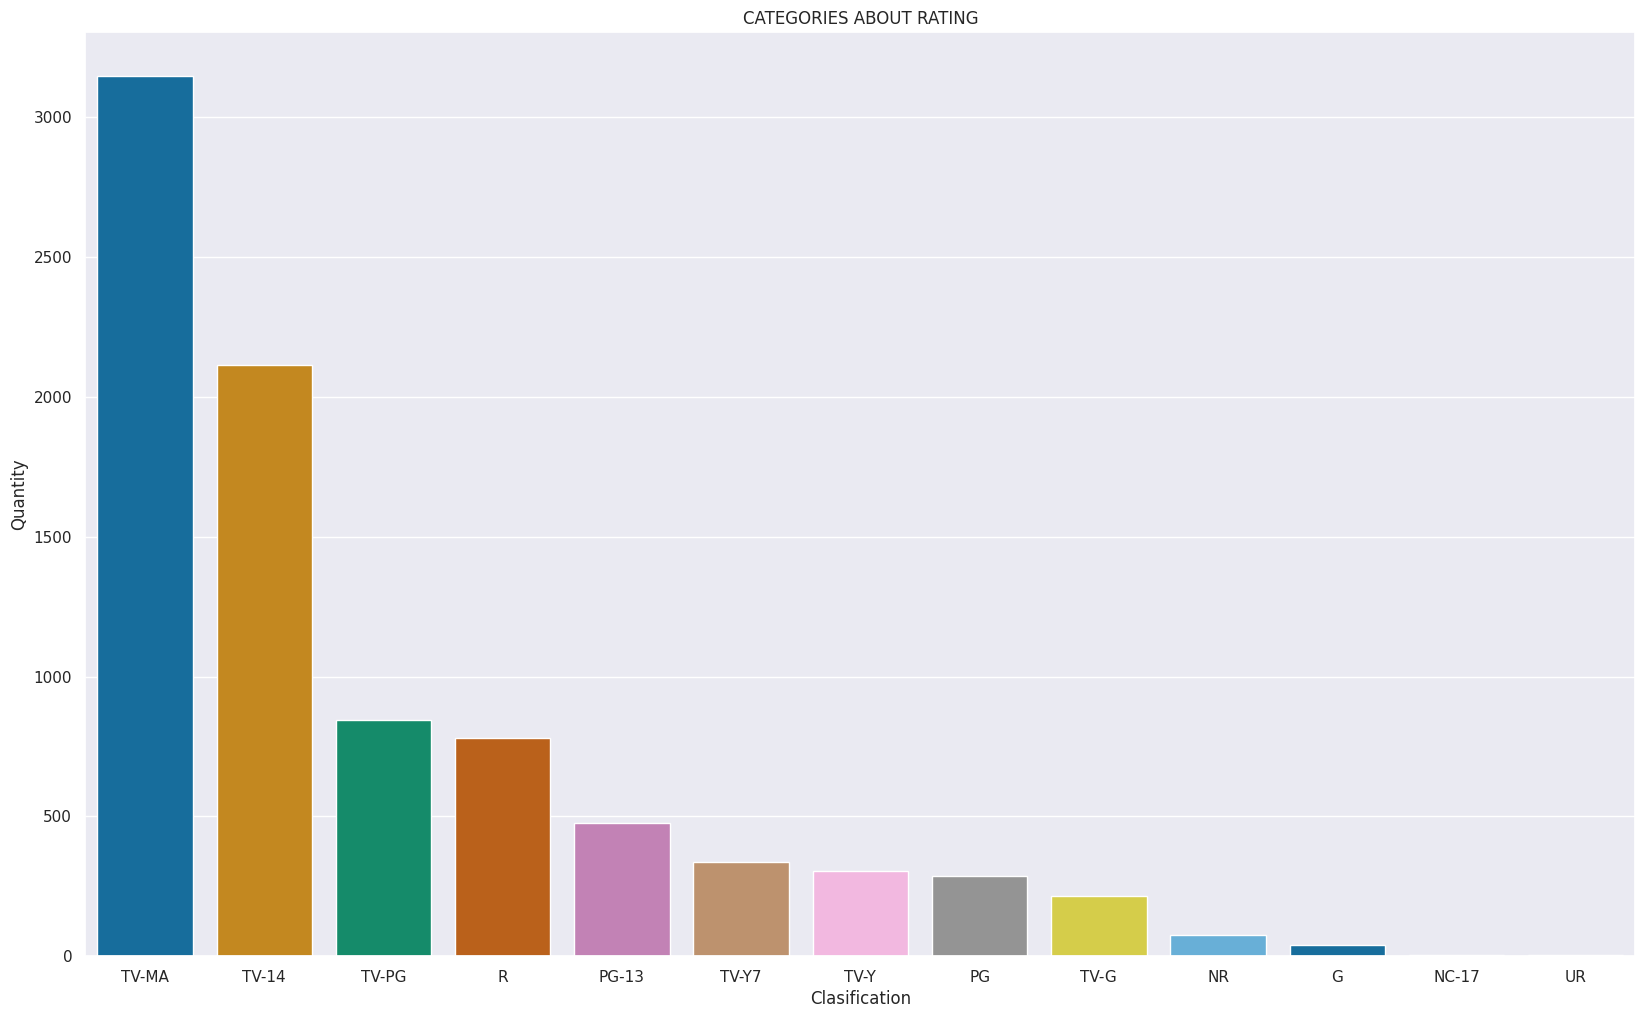

In [ ]:
# 2. (BAR-PLOT)   ------> Variable "RATING"
################################################################################
plt.figure(figsize=(20,12))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="colorblind", order=df['rating'].value_counts().index[0:15])
ax.set(title='CATEGORIES ABOUT RATING', xlabel='Clasification', ylabel='Quantity')
plt.show()

In this first bar plot, We watching that among the top categories more outstanding significantly the programs dedicated to an adults audience followed by the teens above 14 years  until the year 2021.

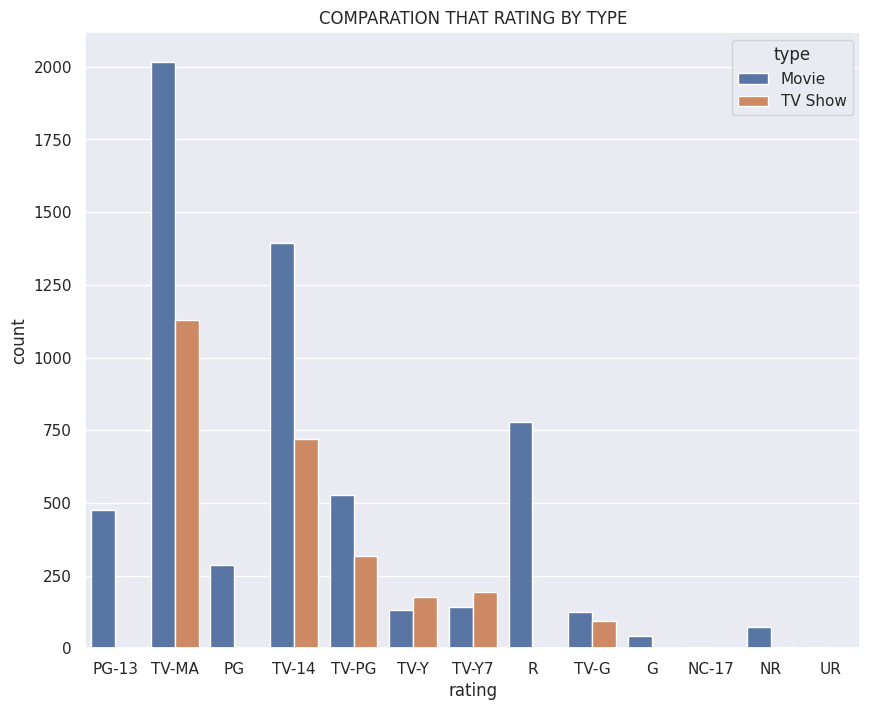

In [ ]:
# 3. (BAR-PLOT)   ------> COMPARATIVE
################################################################################
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('COMPARATION THAT RATING BY TYPE')
plt.show()

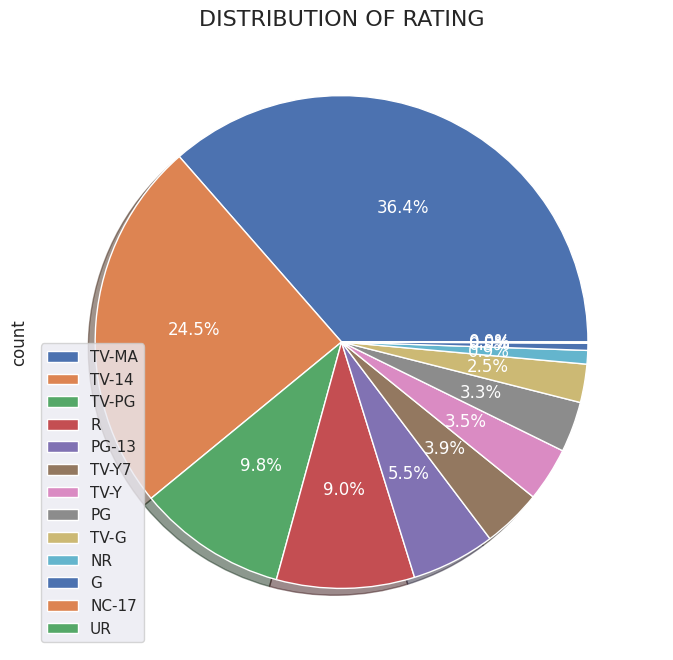

In [ ]:
# 4. PIE CHART (with %)    ------> Variables | type |
################################################################################ Pie-chart for Rating
plt.figure(figsize=(10,8))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',
                                   shadow=True,
                                   figsize=(10,8),
                                   textprops={'color': "w", 'fontsize': 12})
plt.title('DISTRIBUTION OF RATING', fontsize=16)
plt.legend(labels=df['rating'].value_counts().index, loc='best')
plt.show()

In [ ]:
# WordCloud
#####################
from wordcloud import WordCloud

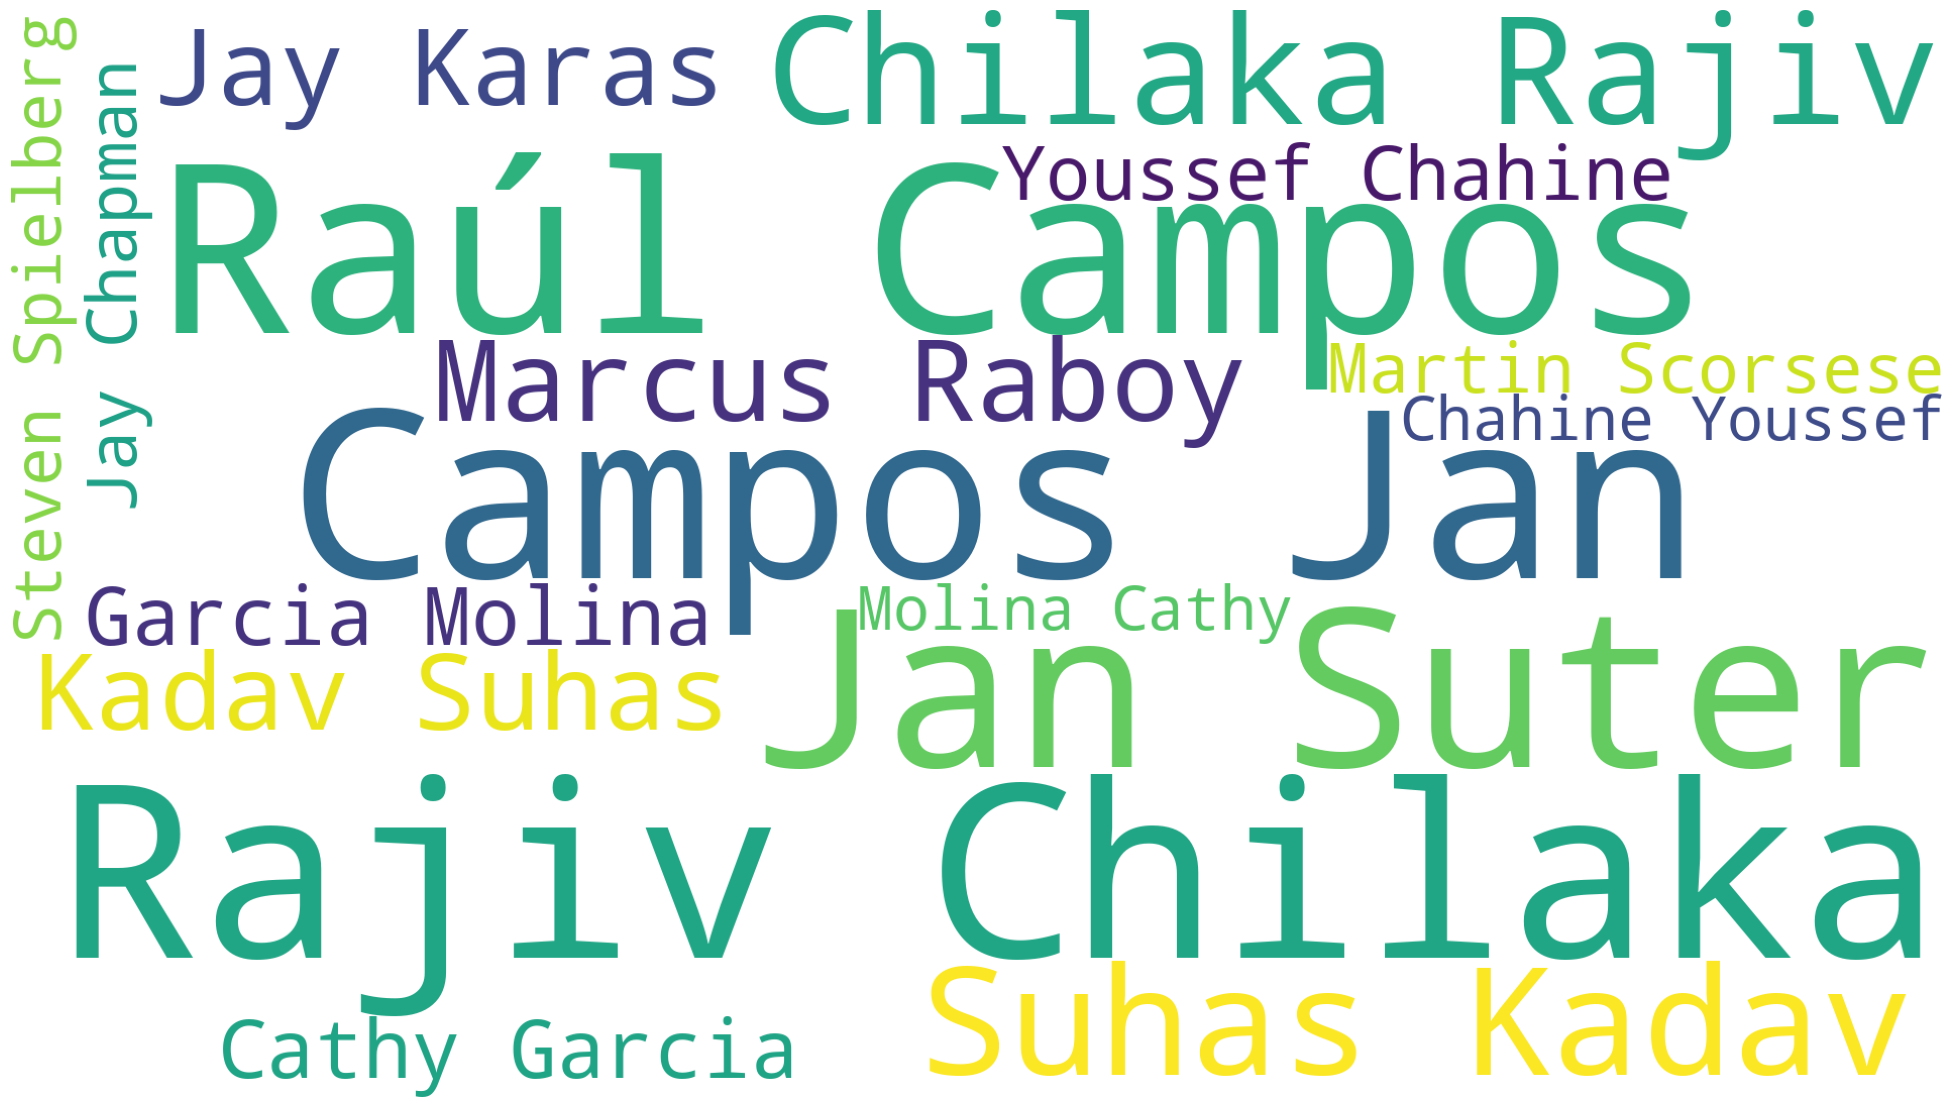

In [ ]:
# 5. Cloud of Ideas   ------> Variables | top 10 directors |
################################################################################
df_filtered = df[df['director'] != "NULL"]
# Get the 10 most frequent directors
top_10_directors = df_filtered['director'].value_counts().head(10).index.tolist()

# Filter DataFrame to include only the top 10 directos
df_top_10 = df_filtered[df_filtered['director'].isin(top_10_directors)]

# Create WordCloud
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(df_top_10['director']))

plt.figure(figsize=(25,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('top_10_directors.png')
plt.show()

> **4. RECOMMENDATION SYSTEM**

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8633 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8633 non-null   object
 1   type          8633 non-null   object
 2   title         8633 non-null   object
 3   director      8633 non-null   object
 4   cast          8633 non-null   object
 5   country       8633 non-null   object
 6   date_added    8633 non-null   object
 7   release_year  8633 non-null   int64 
 8   rating        8633 non-null   object
 9   duration      8633 non-null   object
 10  listed_in     8633 non-null   object
 11  description   8633 non-null   object
dtypes: int64(1), object(11)
memory usage: 876.8+ KB


In [ ]:
print("\nValores faltantes en df_net:")
print(missing(df_net))                  # Data at startup

print("Valores faltantes en df:")
print(missing(df))                      # Data at the end


Valores faltantes en df_net:
          Column  Missing_value_count  Missing_Percentage (%)
3       director                 2634                   29.91
5        country                  831                    9.44
4           cast                  825                    9.37
6     date_added                   10                    0.11
8         rating                    4                    0.05
9       duration                    3                    0.03
0        show_id                    0                    0.00
1           type                    0                    0.00
2          title                    0                    0.00
7   release_year                    0                    0.00
10     listed_in                    0                    0.00
11   description                    0                    0.00
Valores faltantes en df:
          Column  Missing_value_count  Missing_Percentage (%)
0        show_id                    0                     0.0
1           typ

In [ ]:
# 1. Create new data "df_recomm" & Transform null values to empty string
################################################################
df_recomm = df.fillna('')

In [ ]:
# 2. Define an object to Clean and transform
################################################################
def data_cleaning(x):
    return str.lower(x.replace(" ", ""))

In [ ]:
# 3. Define specific columns to filter
################################################################
data_features = ['title', 'director', 'cast', 'listed_in', 'description']

df_recomm = df_recomm[data_features]
df_recomm.head(3)

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NULL,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NULL,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
# 4. Applying "data_cleaning" in "data_features"
################################################################
for feature in data_features:
    df_recomm[feature] = df_recomm[feature].apply(data_cleaning)

df_recomm.head(3)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,null,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,null,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."


In [ ]:
# 5. Defines the concatenation of the values
################################################################
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
# 6. Applying function and create new column
################################################################
df_recomm['joined_columns'] = df_recomm.apply(content_include, axis = 1) # axis = 1 (Apply to each row)

# Verifying
df_recomm.head(3)

,title,director,cast,listed_in,description,joined_columns
0,dickjohnsonisdead,kirstenjohnson,null,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead kirstenjohnson null document...
1,blood&water,null,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...","blood&water null amaqamata,khosingema,gailmaba..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...","ganglands julienleclercq samibouajila,tracygot..."


In [ ]:
# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer       # Display the frequency of each word
from sklearn.metrics.pairwise import cosine_similarity            # Calculate similitude between VECTORS

In [ ]:
# 7. Using COUNTVECTORIZER
################################################################
countvec = CountVectorizer(stop_words='english')                                # Remove common english words
countvec_matrix = countvec.fit_transform(df_recomm['joined_columns'])           # Learn and convert each document in a vector of term counts

print(countvec_matrix.shape)

(8633, 74892)


In [ ]:
# 8. Measuring similarity content
################################################################
# Measuring similarity between content descriptions based on word frequency
cosine_sim = cosine_similarity(countvec_matrix, countvec_matrix)

# A new column is created that retains these original indexes
new_netflix_data=df_recomm.reset_index()

# Extracts the row indexes.
# Sets the index of this Series as the titles of the movies/series in the DF.
indices = pd.Series(df_recomm.index, index=df_recomm['title'])

In [ ]:
# 9. Define de function for get new recommendations
################################################################
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

# 10. Get the main features of my search
################################################################
    sim_scores = list(enumerate(cosine_sim[idx]))
        # Gets the pairwise similarity scores of all movies with that movie selected.

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the movies according to similarity scores

    sim_scores = sim_scores[1:11]
        # Get the top 10 similarity score movies
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

**RESULTS**

---



In [ ]:
# Result n°1 : A list with the titles of the 10 most similar movies to "Alien TV".
get_recommendations_new('Alien TV', cosine_sim)

,title
1517,Ma Rainey's Black Bottom
5010,Love Beats Rhymes
3709,ANIMA
7943,Satrangi Re
1518,Ma Rainey's Black Bottom: A Legacy Brought to ...
4972,Paradox
4975,Secret Superstar
5441,The Wishing Tree
8341,The Help
1214,Quiet


In [ ]:
# Result n°2 : A list with the titles of the 10 most similar movies to "The Walking Dead".
get_recommendations_new('The Walking Dead', cosine_sim)

,title
698,Fan Girl
4783,The Skin of the Wolf
6028,A Billion Colour Story
633,Into the Wind
3740,Pihu
4306,ROMA
4357,Manto
3254,Mallesham
3797,Joy
4740,Invisible


In [ ]:
# Result n°3 : A list with the titles of the 10 most similar movies to "ROMA".
get_recommendations_new('ROMA', cosine_sim)

,title
234,Oggy Oggy
522,Larva
5877,Sammy & Co
8423,The Minimighty Kids
8803,Zombie Dumb
1952,Mighty Little Bheem
3953,Kicko & Super Speedo
936,Miniforce: Super Dino Power
123,Luv Kushh
263,Mother Goose Club
